<a href="https://colab.research.google.com/github/deepenmi/pyTorchPractice/blob/master/DeepNeuralNetwork_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [0]:
n_pts = 500
centers = [[-0.5, 0.5],[0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

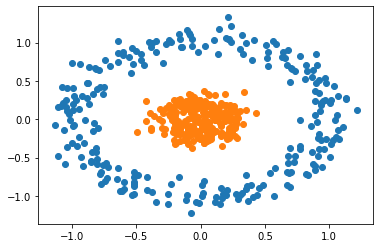

In [15]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    pred = self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0



In [24]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [26]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947320699691772
epoch: 2 loss 0.6955163478851318
epoch: 3 loss 0.7014891505241394
epoch: 4 loss 0.7013985514640808
epoch: 5 loss 0.6974702477455139
epoch: 6 loss 0.6939254403114319
epoch: 7 loss 0.6928594708442688
epoch: 8 loss 0.6939384937286377
epoch: 9 loss 0.6954389810562134
epoch: 10 loss 0.6958749294281006
epoch: 11 loss 0.6949177384376526
epoch: 12 loss 0.6931487321853638
epoch: 13 loss 0.6913900375366211
epoch: 14 loss 0.6901611685752869
epoch: 15 loss 0.6894587874412537
epoch: 16 loss 0.6888436079025269
epoch: 17 loss 0.6877667307853699
epoch: 18 loss 0.685900866985321
epoch: 19 loss 0.6832477450370789
epoch: 20 loss 0.6800417304039001
epoch: 21 loss 0.6765585541725159
epoch: 22 loss 0.6729682087898254
epoch: 23 loss 0.6692693829536438
epoch: 24 loss 0.6653285026550293
epoch: 25 loss 0.6609663963317871
epoch: 26 loss 0.656058669090271
epoch: 27 loss 0.6505836248397827
epoch: 28 loss 0.6446024775505066
epoch: 29 loss 0.638197839

Text(0.5, 0, 'epoch')

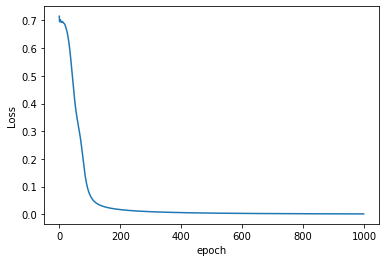

In [27]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')


In [0]:
def plot_decision_boundary(X, y):
  X_span = np.linspace(min(X[:, 0]) -0.25, max(X[:,0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:,1]) + 0.25)
  xx, yy = np.meshgrid(X_span, y_span)
  
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)


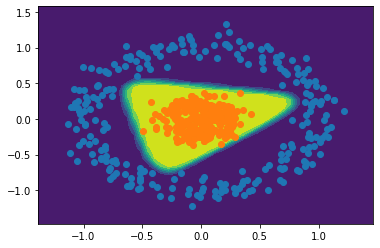

In [39]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


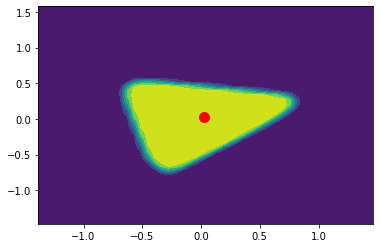

In [42]:
x = 0.025
y= 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is", prediction)
plot_decision_boundary(X,y)